In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv')

In [4]:
display(df.head())
df.dtypes

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

#### Store_ID is a nominal (categorical) variable.

We should address it as such, however, there is a large number of different values, so it is a bad idea to One-Hot encode them. We created bins to group stores by the number of sales.

In [58]:
df_stores

,Store_ID,Sales
0,1,3964.060656
1,2,4155.073333
2,3,5806.489039
3,4,7959.151463
4,5,3857.385135
...,...,...
1110,1111,4419.045763
1111,1112,8264.005008
1112,1113,5545.352445
1113,1114,17191.450777


<Axes: xlabel='Sales', ylabel='Count'>

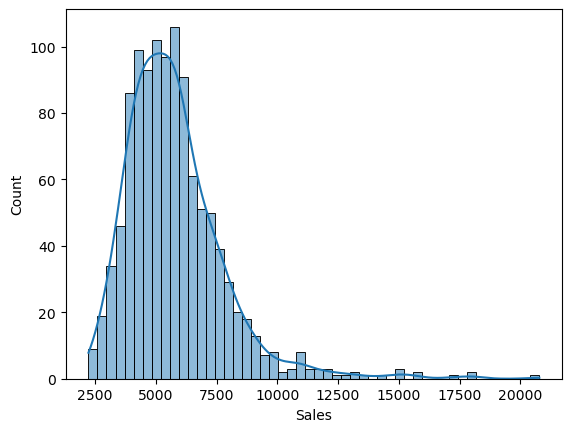

In [53]:
df_stores = df.groupby('Store_ID')['Sales'].mean().reset_index()
sns.histplot(df_stores['Sales'], bins=50, kde=True)

The distribution is far from Normal, it is tailed on the right-side with a few stores having larger number of sales. To account for that, we will group them in a separate bin.

In [71]:
df['Store_sales'] = pd.cut(df['Sales'], bins = [0, 3750, 6250, 8750, 12500, 40000], labels = ['low', 'medium', 'moderate', 'high', 'vhigh'])

In [75]:
pd.get_dummies(df['Store_sales'], dtype = 'boolean')

,low,medium,moderate,high,vhigh
0,False,False,True,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
640835,False,True,False,False,False
640836,False,False,False,False,True
640837,False,True,False,False,False
640838,False,False,True,False,False


#Casting as correct data type

In [6]:
df['Date'] = df['Date'].astype('date32[pyarrow]')
df.dtypes

True_index                            int64
Store_ID                              int64
Day_of_week                           int64
Date                   date32[day][pyarrow]
Nb_customers_on_day                   int64
Open                                  int64
Promotion                             int64
State_holiday                        object
School_holiday                        int64
Sales                                 int64
dtype: object

Open
1    0.830185
0    0.169815
Name: proportion, dtype: float64


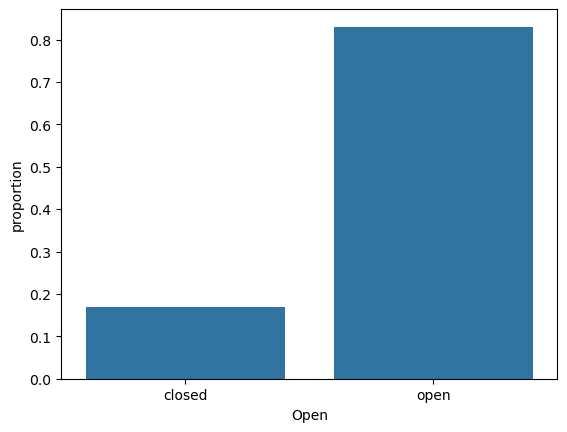

In [7]:
print(df['Open'].value_counts('normalised'))
sns.barplot(df['Open'].value_counts('normalised'))
plt.xticks([0,1], ['closed', 'open'])
plt.show()

In [10]:
#pickle.dump(<model_name>, open('model.pkl', 'wb'))
#loaded_model = pickle.load(open('model.pkl', 'rb'))